In [ ]:
#import all the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#import data
data_o = pd.read_csv('Fe-based BMG Dataset.csv')

#EDA


In [ ]:
data_o.head()
data_o.describe(include='all')
data_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      480 non-null    float64
 1   Ref.    480 non-null    object 
 2   Alloy   480 non-null    object 
 3   Dmax    480 non-null    float64
 4   Fe      480 non-null    float64
 5   Co      480 non-null    float64
 6   B       480 non-null    float64
 7   Si      480 non-null    float64
 8   Nb      480 non-null    float64
 9   Ni      480 non-null    float64
 10  Y       480 non-null    float64
 11  Zr      480 non-null    float64
 12  Cr      480 non-null    float64
 13  Mo      480 non-null    float64
 14  P       480 non-null    float64
 15  C       480 non-null    float64
 16  Hf      480 non-null    float64
 17  Al      480 non-null    float64
 18  Dy      480 non-null    float64
 19  Er      480 non-null    float64
 20  Mn      480 non-null    float64
 21  Ti      480 non-null    float64
 22  V 

In [ ]:
data = data_o.dropna()

Now there are no null values in the data_1

In [ ]:
data['Dmax'].describe()

count    479.000000
mean       3.043952
std        2.293112
min        0.055000
25%        1.550000
50%        2.500000
75%        4.000000
max       18.000000
Name: Dmax, dtype: float64

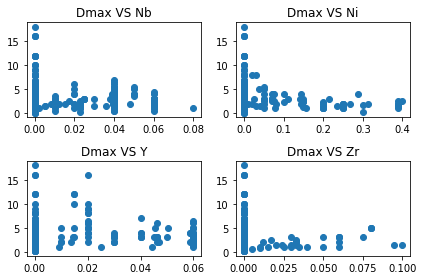

In [ ]:
figure, axis = plt.subplots(2,2)
axis[0,0].scatter(data['Nb'].values , data['Dmax'].values )
axis[0,0].set_title('Dmax VS Nb')
axis[0,1].scatter(data['Ni'].values , data['Dmax'].values )
axis[0,1].set_title('Dmax VS Ni')
axis[1,0].scatter(data['Y'].values , data['Dmax'].values )
axis[1,0].set_title('Dmax VS Y')
axis[1,1].scatter(data['Zr'].values , data['Dmax'].values )
axis[1,1].set_title('Dmax VS Zr')
plt.tight_layout()



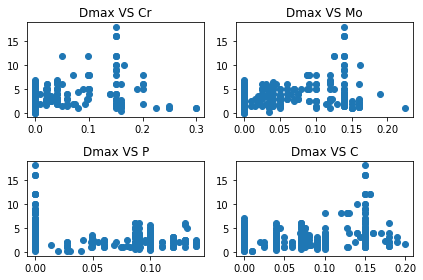

In [ ]:
figure, axis = plt.subplots(2,2)
axis[0,0].scatter(data['Cr'].values , data['Dmax'].values )
axis[0,0].set_title('Dmax VS Cr')
axis[0,1].scatter(data['Mo'].values , data['Dmax'].values )
axis[0,1].set_title('Dmax VS Mo')
axis[1,0].scatter(data['P'].values , data['Dmax'].values )
axis[1,0].set_title('Dmax VS P')
axis[1,1].scatter(data['C'].values , data['Dmax'].values )
axis[1,1].set_title('Dmax VS C')
plt.tight_layout()



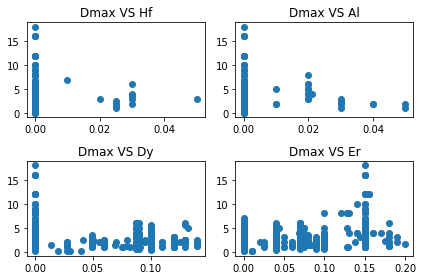

In [ ]:
figure, axis = plt.subplots(2,2)
axis[0,0].scatter(data['Hf'].values , data['Dmax'].values )
axis[0,0].set_title('Dmax VS Hf')
axis[0,1].scatter(data['Al'].values , data['Dmax'].values )
axis[0,1].set_title('Dmax VS Al')
axis[1,0].scatter(data['P'].values , data['Dmax'].values )
axis[1,0].set_title('Dmax VS Dy')
axis[1,1].scatter(data['C'].values , data['Dmax'].values )
axis[1,1].set_title('Dmax VS Er')
plt.tight_layout()



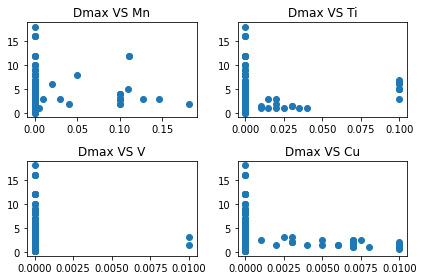

In [ ]:
figure, axis = plt.subplots(2,2)
axis[0,0].scatter(data['Mn'].values , data['Dmax'].values )
axis[0,0].set_title('Dmax VS Mn')
axis[0,1].scatter(data['Ti'].values , data['Dmax'].values )
axis[0,1].set_title('Dmax VS Ti')
axis[1,0].scatter(data['V'].values , data['Dmax'].values )
axis[1,0].set_title('Dmax VS V')
axis[1,1].scatter(data['Cu'].values , data['Dmax'].values )
axis[1,1].set_title('Dmax VS Cu')
plt.tight_layout()



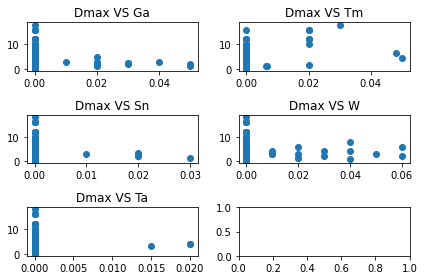

In [ ]:
figure, axis = plt.subplots(3,2)
axis[0,0].scatter(data['Ga'].values , data['Dmax'].values )
axis[0,0].set_title('Dmax VS Ga')
axis[0,1].scatter(data['Tm'].values , data['Dmax'].values )
axis[0,1].set_title('Dmax VS Tm')
axis[1,0].scatter(data['Sn'].values , data['Dmax'].values )
axis[1,0].set_title('Dmax VS Sn')
axis[1,1].scatter(data['W'].values , data['Dmax'].values )
axis[1,1].set_title('Dmax VS W')
axis[2,0].scatter(data['Ta'].values , data['Dmax'].values )
axis[2,0].set_title('Dmax VS Ta')
plt.tight_layout()



In [ ]:
(data==0).sum()

ID         0
Ref.       0
Alloy      0
Dmax       0
Fe         0
Co       340
B         23
Si       316
Nb       337
Ni       411
Y        389
Zr       448
Cr       353
Mo       274
P        293
C        215
Hf       467
Al       455
Dy       446
Er       429
Mn       457
Ti       459
V        477
Cu       446
Ga       462
Tm       468
Sn       474
W        464
Ta       476
dtype: int64

# Data Allocation

In [ ]:
#data preprocessing is not needed ig 

X = data.iloc[:, 4:].values
y = data.iloc[:,3].values
y = y.reshape(len(y),1)
print(X.shape)

(479, 25)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)


# Deep Learning


### Importing Deep Learnign Libraries

In [ ]:
import tensorflow as tf
tf.__version__

'2.5.0'

### Preprocessing of the data

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_de = StandardScaler()
X_train = sc_de.fit_transform(X_train)
X_test = sc_de.transform(X_test)

### Creating a Network


#### Generating a skeleton

In [ ]:
ann = tf.keras.models.Sequential() #created a object

#### Creating first hidden layer

In [ ]:
f_layer = tf.keras.layers.Dense(units=16, activation='relu')
ann.add(f_layer)

#### Creating Second hidden layer

In [ ]:
s_layer = tf.keras.layers.Dense(units=16, activation='relu')
ann.add(s_layer) #% accuracy

#### Creating a Third Layer

In [ ]:
t_layer = tf.keras.layers.Dense(units=16, activation='relu')
ann.add(t_layer) #67 %

#### Creating a Fourth Layer

In [ ]:
fo_layer = tf.keras.layers.Dense(units = 16, activation = 'relu')
ann.add(fo_layer) #73%# 

#### Creating a Fifth Layer

In [ ]:
# fi_layer = tf.keras.layers.Dense(units = 16, activation='relu')
# ann.add(fi_layer) # 70%

#### Creating a output layer

In [ ]:
o_layer = tf.keras.layers.Dense(units=1)# no activation function as this is a regression
ann.add(o_layer)

### Compiling the NN

In [ ]:
ann.compile(optimizer='adam', loss='mean_squared_error')

### Training the Neural Network on training data, Behold !

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 14.5706
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 12.1912
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 9.9916
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 7.8903
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 6.2687
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 5.3524
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 4.9550
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 4.5135
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 4.2941
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 4.1271
Epoch 11/100
12/12 [==============================] - 0s 2ms/step - loss: 3.9867
Epoch 12/100
12/12 [==============================] - 0s 3ms/step - loss: 3.8427
Epoch 13/100
12/12 [===============

### Predicting on Test Data

In [ ]:
y_pred = ann.predict(X_test)
print(y_pred.shape)
y_test = np.reshape(y_test, (len(y_test),1 ))
final = np.concatenate((y_test, y_pred), 1)

(96, 1)


###### Accuracy

In [ ]:
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)
print(accuracy)

0.7699142996395838
